## Обучение целевой модели

Целевая модель - это модель, в которую мы загружаем аннотированный датасет и которая готова к развертыванию. Целевые модели обычно небольшие, быстрые и настроенные под конкретную задачу. Например, такой моделью является YOLOv8, которая используется в этом блокноте.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

Z:\dev\ITT_practicum\data_processing


In [2]:
DATA_YAML_PATH = f"{HOME}/dataset/data.yaml"

In [3]:
%cd {HOME}

from autodistill_yolov8 import YOLOv8

target_model = YOLOv8("yolov8s.pt")
target_model.train(DATA_YAML_PATH, epochs=150, device=0)

Z:\dev\ITT_practicum\data_processing


Z:\dev\ITT_practicum\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


*******************************************
<_io.BufferedReader name='yolov8s.pt'>
*******************************************


New https://pypi.org/project/ultralytics/8.2.54 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81  Python-3.11.9 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=Z:\dev\ITT_practicum\data_processing/dataset/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, a

*******************************************
<_io.BufferedReader name='yolov8n.pt'>
*******************************************


AMP: checks passed 
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning Z:\dev\ITT_practicum\data_processing\dataset\train\labels.cache... 1426 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1426/1426 [00:00<?, ?it/s]
val: Scanning Z:\dev\ITT_practicum\data_processing\dataset\valid\labels.cache... 357 images, 24 backgrounds, 0 corrupt: 100%|██████████| 357/357 [00:00<?, ?it/s]
Plotting labels to Z:\dev\ITT_practicum\runs\detect\train\labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Z:\dev\ITT_practicum\runs\detect\train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/150      4.13G      1.031      1.882      1.358          9        640: 100%|██████████| 90/90 [00:24<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03

*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\last.pt'>
*******************************************
*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\best.pt'>
*******************************************


Optimizer stripped from Z:\dev\ITT_practicum\runs\detect\train\weights\best.pt, 22.5MB

Validating Z:\dev\ITT_practicum\runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.0.81  Python-3.11.9 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)


*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\best.pt'>
*******************************************


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                   all        357        506      0.668      0.579      0.605      0.464
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to Z:\dev\ITT_practicum\runs\detect\train


*******************************************
<_io.BufferedReader name='Z:\\dev\\ITT_practicum\\runs\\detect\\train\\weights\\best.pt'>
*******************************************


## Валидация результатов

**ВАЖНО:** YOLOv8 позволяет посмотреть на результаты обучения в виде матрицы, графиков и изображений.

Z:\dev\ITT_practicum\data_processing


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


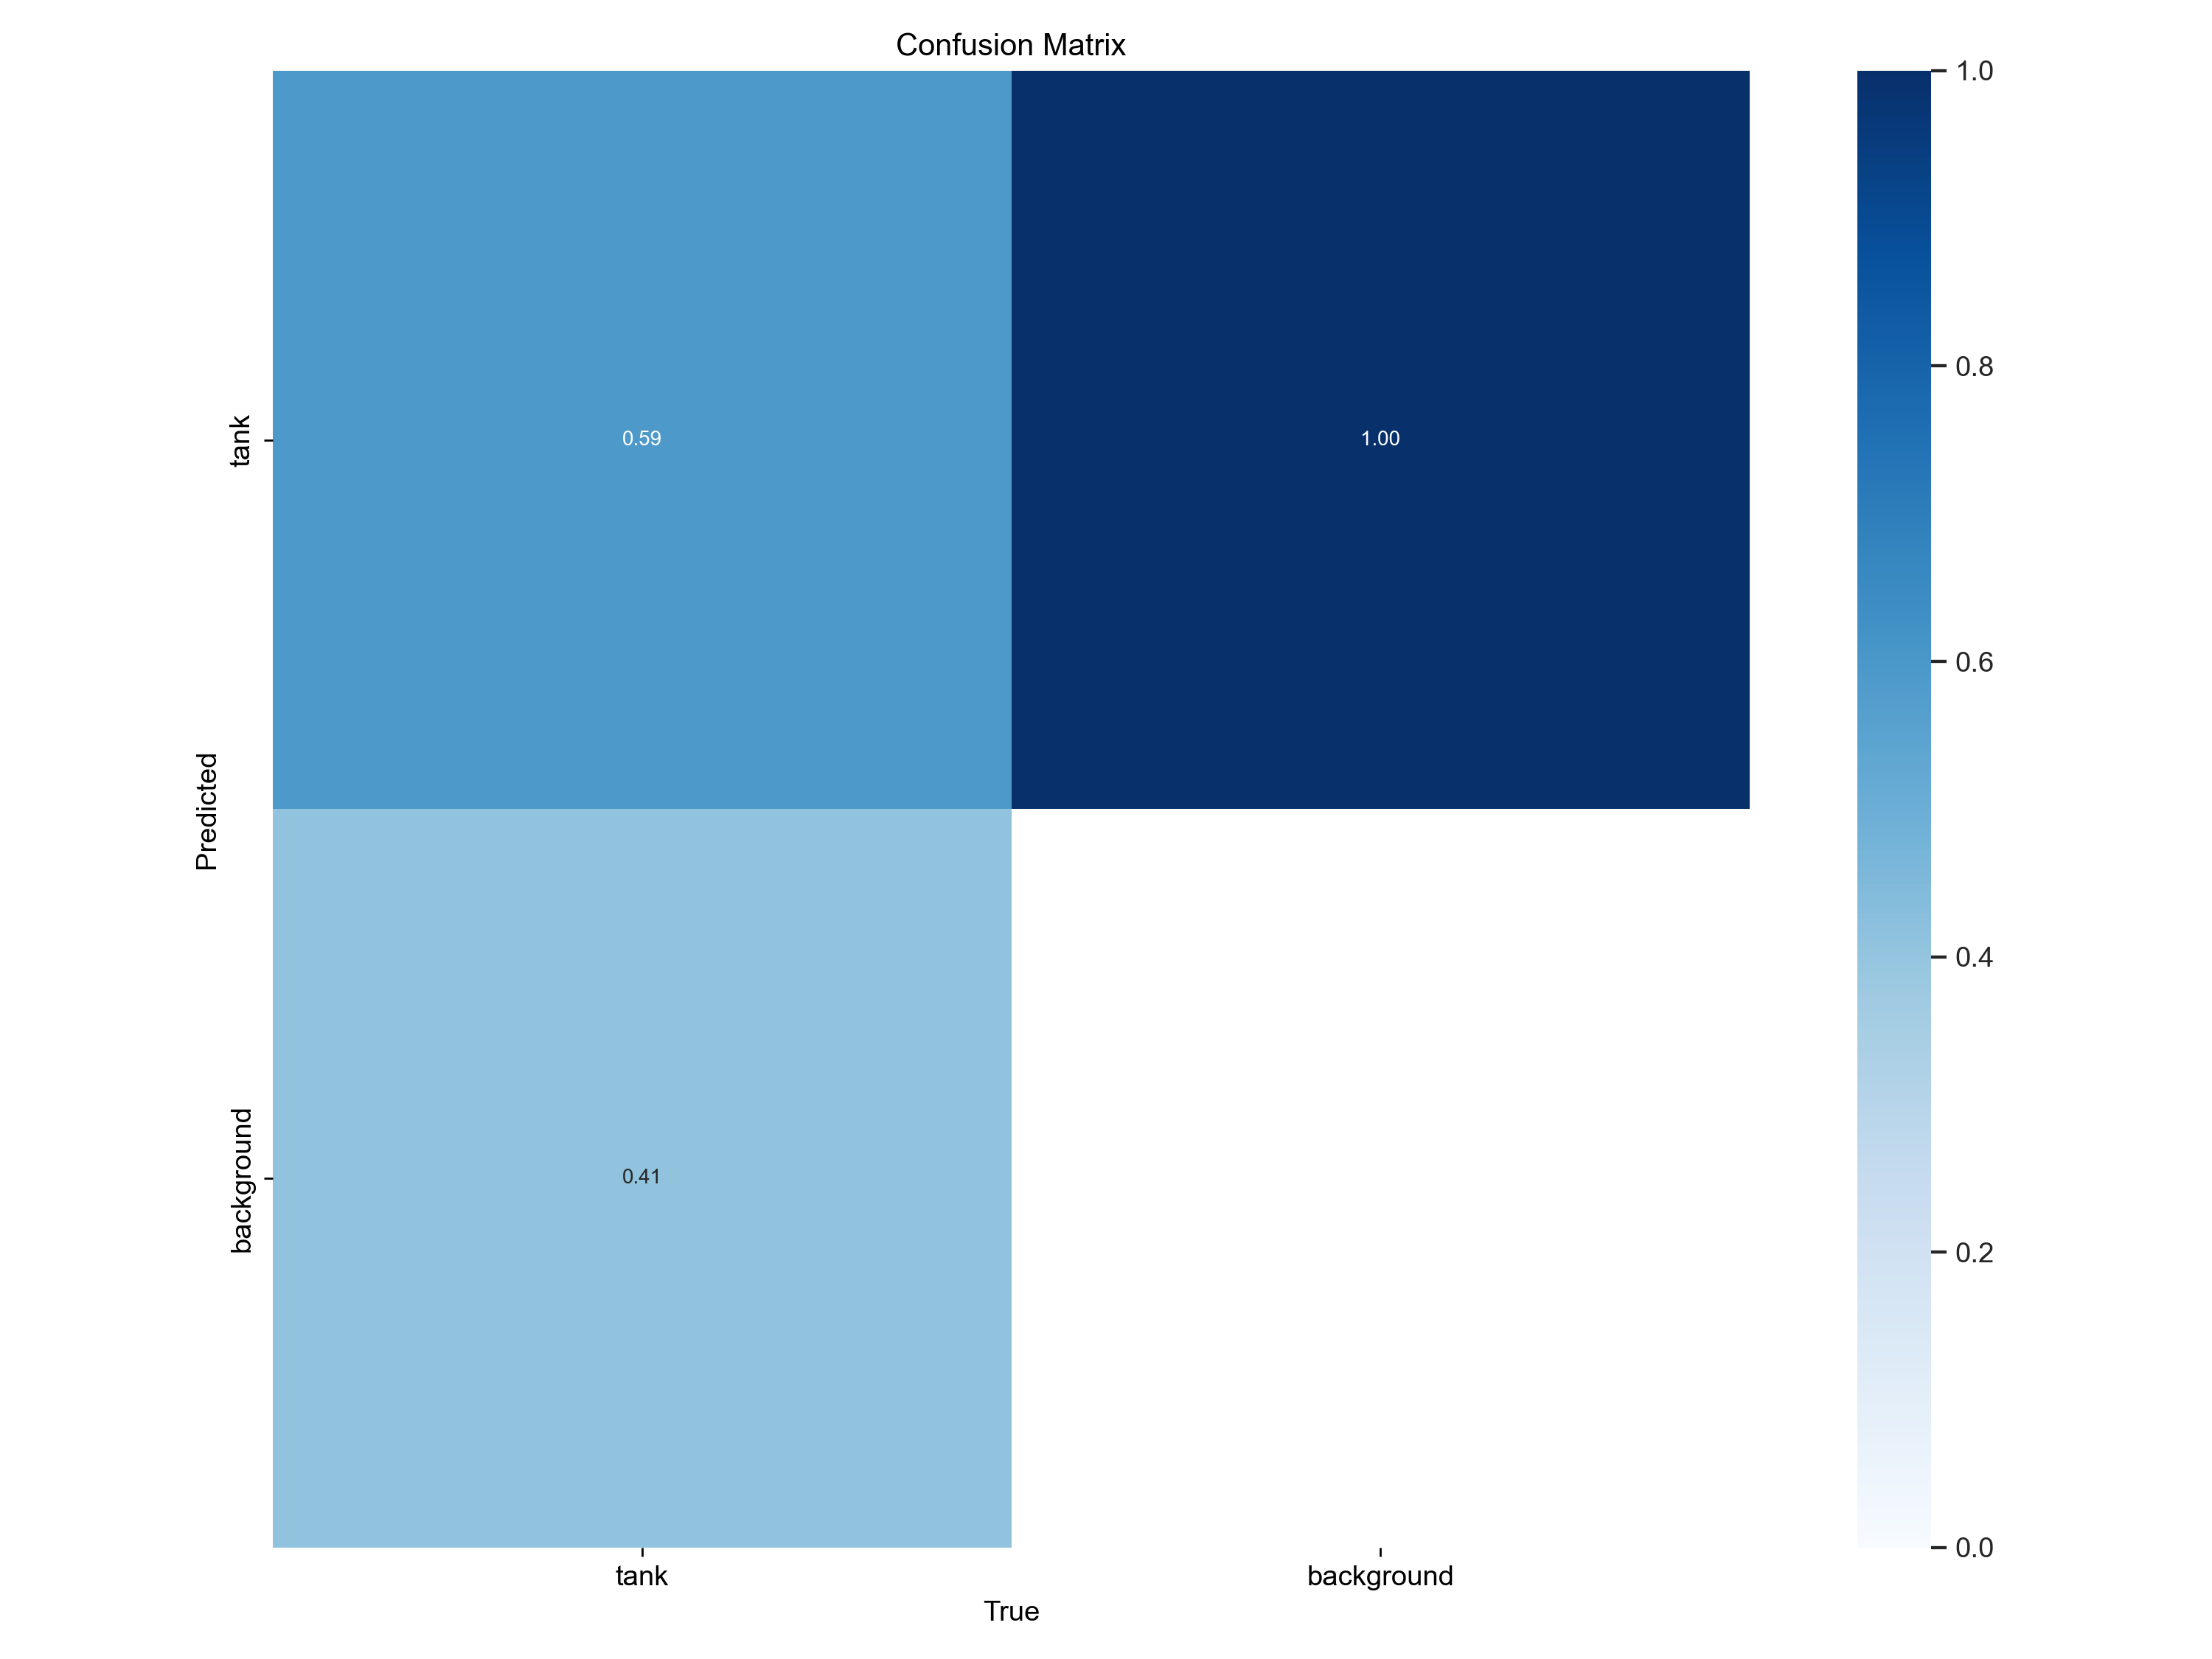

In [4]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/../runs/detect/train/confusion_matrix.png', width=600)

Z:\dev\ITT_practicum\data_processing


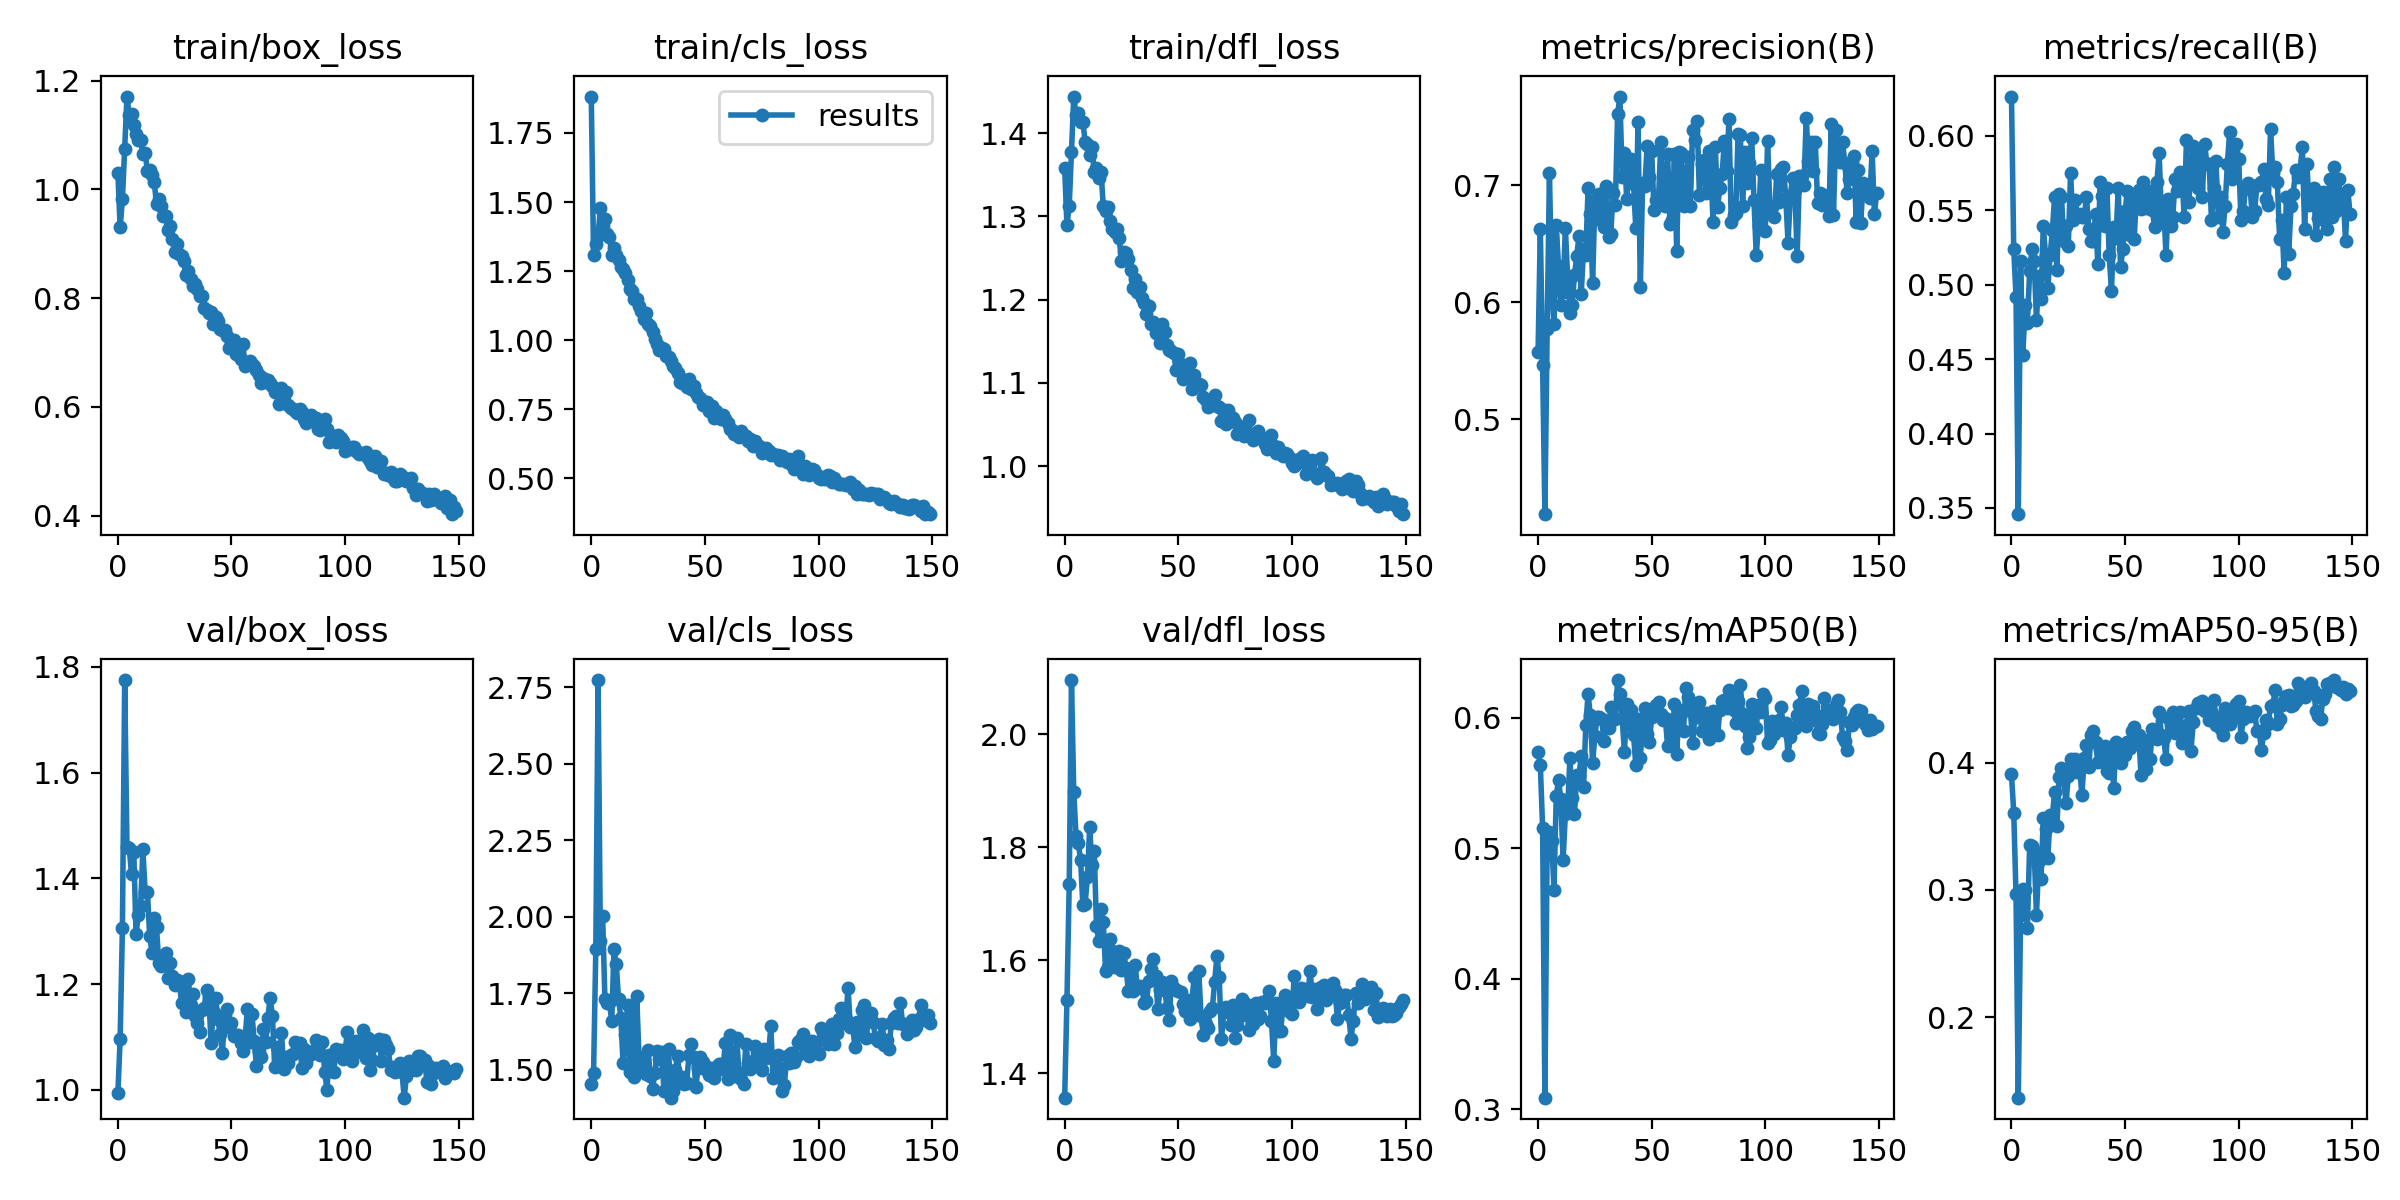

In [5]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/../runs/detect/train/results.png', width=600)

Z:\dev\ITT_practicum\data_processing


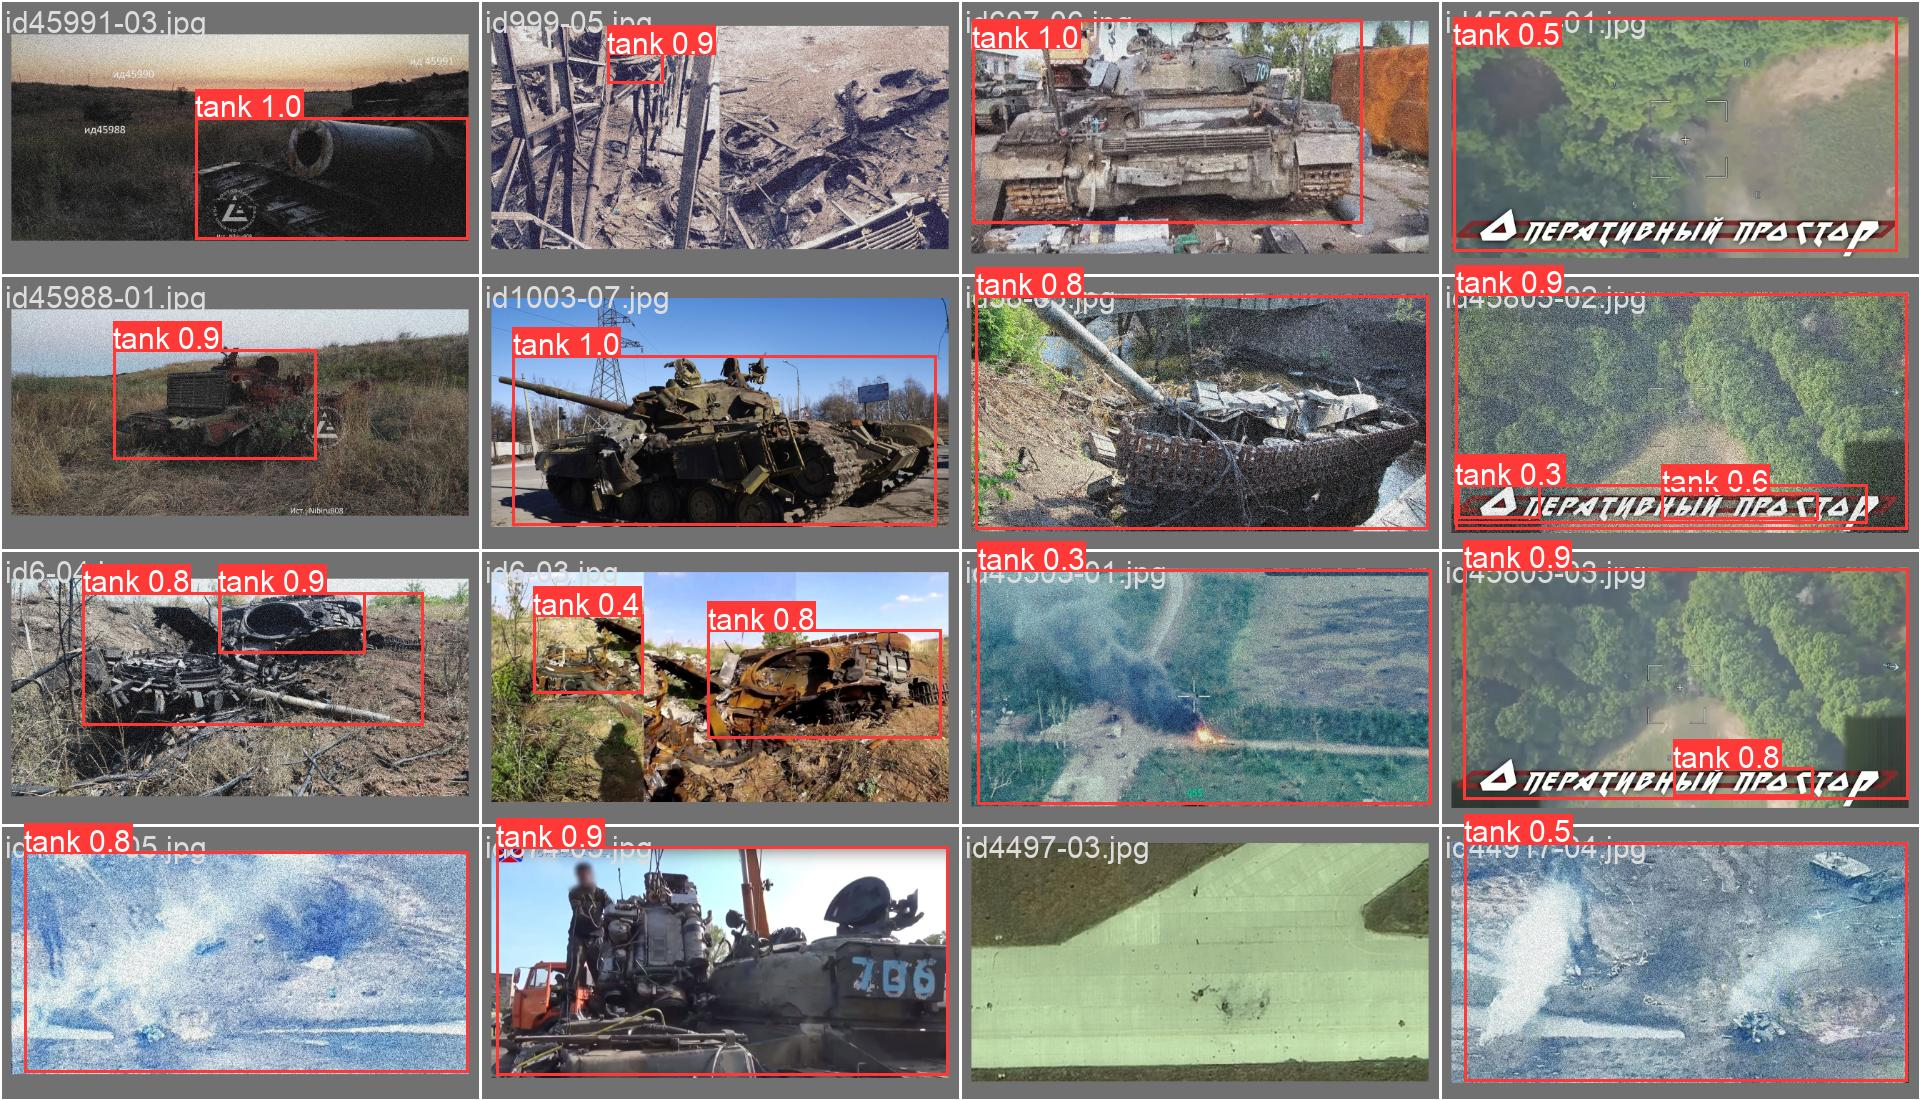

In [6]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/../runs/detect/train/val_batch0_pred.jpg', width=600)

Как видно из результатов, модель отлично справляется с качественными изображениями танков, но находит странные корреляции на изображениях без явного присутствия танков.